In [85]:
import pandas as pd
import numpy as np

In [86]:
data = "https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv"

In [87]:
!wget $data

--2021-09-19 12:26:13--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘AB_NYC_2019.csv.1’

AB_NYC_2019.csv.1   100%[===================>]   6.75M  --.-KB/s    in 0.06s   

2021-09-19 12:26:13 (104 MB/s) - ‘AB_NYC_2019.csv.1’ saved [7077973/7077973]



In [88]:
df = pd.read_csv("AB_NYC_2019.csv")

In [89]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

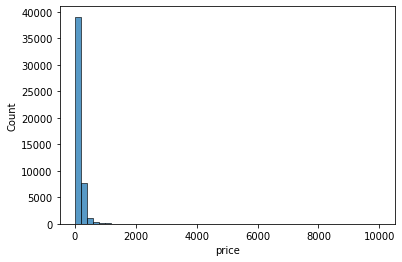

In [91]:
sns.histplot(df.price,bins = 50)

Question 1
Find a feature with missing values. How many missing values does it have?

In [92]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Question 2
What's the median (50% percentile) for variable 'minimum_nights'?

In [93]:
df["minimum_nights"].median()

3.0

In [94]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [95]:
#split the data
n = len(df)
n_val = int(n*0.2)
n_test = int(n*0.2)
n_train = n-(n_val + n_test)

In [96]:
n_val,n_test,n_train

(9779, 9779, 29337)

In [97]:
df_train = df.iloc[n_train:]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [98]:
idx = np.arange(n)

In [99]:
idx

array([    0,     1,     2, ..., 48892, 48893, 48894])

In [100]:
np.random.seed(42)
np.random.shuffle(idx)

In [101]:
idx

array([  879, 44383, 15394, ..., 38158,   860, 15795])

In [102]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [103]:
df_test.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
19797,15854548,Great Brooklyn location next to subway and cafes,1939376,Audrey,Brooklyn,Clinton Hill,40.68866,-73.96147,Private room,48,20,24,2019-05-01,0.78,1,304
39219,30580668,Clinton Hill Studio,2948760,Ian,Brooklyn,Clinton Hill,40.68554,-73.96651,Entire home/apt,120,3,3,2019-04-27,0.47,1,0
45806,34962230,Private studio 539\nManhattan/Reviews-check pr...,183571032,Igor,Manhattan,Upper East Side,40.76805,-73.94929,Entire home/apt,150,1,2,2019-06-17,2.00,1,83
17290,13667440,Private room in the best location of NYC,22019073,Peter,Manhattan,Hell's Kitchen,40.75571,-73.99594,Private room,90,15,0,NaN,NaN,1,0
45165,34570764,Sonder | 116 John | Sun-Filled 1BR + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70780,-74.00675,Entire home/apt,130,29,0,NaN,NaN,327,349


In [104]:
len(df_train),len(df_val),len(df_test)

(29337, 9779, 9779)

In [105]:
df_train =df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)

In [106]:
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [107]:
del df_train["price"]
del df_val["price"]
del df_test["price"]

Question 3

In [108]:
base = ['latitude', 'longitude','minimum_nights', 'number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

In [109]:

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [110]:
X_train =df_train[base].values
X_train=df_train[base].fillna(0).values
w0,w = train_linear_regression(X_train,y_train)
y_pred = w0+X_train.dot(w)

X_val = df_val[base].values
X_val = df_val[base].fillna(0).values
w0,w = train_linear_regression(X_val,y_val)
y_pred_val = w0+X_val.dot(w)

In [111]:
def rmse(y,y_pred):
    se = (y-y_pred)**2
    mse = se.mean()
    return np.sqrt(mse)


In [112]:
score0 = rmse(y_train,y_pred)

In [113]:
round(score0,2)

0.64

In [115]:
round_val = rmse(y_val,y_pred_val)
round(round_val,2)

0.64

In [116]:
mean_value =df['reviews_per_month'].mean()
mean_value
round(mean_value,2)

1.37

In [117]:
X_train_mean =df_train[base].values
X_train_mean=df_train[base].fillna(1.37).values
w0,w = train_linear_regression(X_train_mean,y_train)
y_pred_mean = w0+X_train.dot(w)

In [118]:
def rmse_mean(y,y_pred_mean):
    se = (y-y_pred_mean)**2
    mse = se.mean()
    return np.sqrt(mse)

In [119]:
score_mean = rmse(y_train,y_pred_mean)
round(score_mean,2)

0.64

Question 4

In [120]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [126]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[5], w[6]))

    0, -419.91, 0.00, 0.00
1e-06, -419.86, 0.00, 0.00
0.0001, -414.98, 0.00, 0.00
0.001, -375.27, 0.00, 0.00
 0.01, -191.78, 0.00, 0.00
  0.1, -32.56, 0.00, 0.00
    1, -3.50, 0.00, 0.00
    5, -0.70, 0.00, 0.00
   10, -0.35, 0.00, 0.00


In [123]:
w_0, w = train_linear_regression_reg(X_train, y_train, r=0)

y_pred = w_0 + X_train.dot(w)
print('train', round(rmse(y_train, y_pred),2))

y_pred = w_0 + X_val.dot(w)
print('val',round(rmse(y_val, y_pred_val),2))


train 0.64
val 0.64


In [127]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, round(rmse(y_val, y_pred),2))

     0 0.64
 1e-06 0.64
0.0001 0.64
 0.001 0.64
  0.01 0.66
   0.1 0.68
     1 0.68
     5 0.68
    10 0.68


Question 5

In [145]:
score = []
for seed in [0,1,2,3,4,5,6,7,8,9]:
  np.random.seed(seed)
  n = len(df)
  n_val = int(0.2 * n)
  n_test =  int(0.2 * n)
  n_train = n - (n_val + n_test)
  idx = np.arange(n)
  np.random.shuffle(idx)
  df_train = df.iloc[idx[:n_train]]
  df_val = df.iloc[idx[n_train:n_train+n_val]]
  df_test = df.iloc[idx[n_train+n_val:]]  
  df_train =df_train.reset_index(drop=True)
  df_val = df_val.reset_index(drop=True)
  df_train = df_train.reset_index(drop=True)

  y_train = np.log1p(df_train.price.values)
  y_val = np.log1p(df_val.price.values)
  y_test = np.log1p(df_test.price.values)


  del df_train['price']
  del df_val['price']
  del df_test['price']

  X_train =df_train[base].values
  X_train=df_train[base].fillna(0).values
  w0,w = train_linear_regression(X_train,y_train)
  y_pred = w0+X_train.dot(w)

  X_val = df_val[base].values
  X_val = df_val[base].fillna(0).values
  w0,w = train_linear_regression(X_val,y_val)
  y_pred_val = w0+X_val.dot(w) 

  score_std = rmse(y_val, y_pred_val)
  score.append(score_std)
  score_std = np.round(score_std,2)
  print("For seed = ", seed, " \t RMSE  : ", score_std)

print("The Standard Deviation of scores for different seed values is :\t", np.round(np.std(score),3))


For seed =  0  	 RMSE  :  0.65
For seed =  1  	 RMSE  :  0.65
For seed =  2  	 RMSE  :  0.65
For seed =  3  	 RMSE  :  0.64
For seed =  4  	 RMSE  :  0.64
For seed =  5  	 RMSE  :  0.63
For seed =  6  	 RMSE  :  0.63
For seed =  7  	 RMSE  :  0.65
For seed =  8  	 RMSE  :  0.65
For seed =  9  	 RMSE  :  0.64
The Standard Deviation of scores for different seed values is :	 0.008


Question 6

In [146]:
np.random.seed(9)
n = len(df)
n_val = int(0.2 * n)
n_test =  int(0.2 * n)
n_train = n - (n_val + n_test)
idx = np.arange(n)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]  
df_train =df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)


y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)


del df_train['price']
del df_val['price']
del df_test['price']

In [148]:
df_train_combine = pd.concat([df_train, df_val])
df_train_combine = df_train_combine.reset_index(drop = True)
df_train_combine

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,20325986,Brooklyn Condominium - Bushwick,145013050,Dylan,Brooklyn,Bushwick,40.70423,-73.91595,Private room,1,3,2017-09-01,0.13,1,0
1,582372,Comfy New York City Launching Pad!!,733370,Tim,Queens,Astoria,40.77115,-73.92275,Private room,40,23,2016-07-01,0.27,1,207
2,24751022,Sonder | Hanover Square | Welcoming 1BR + Rooftop,12243051,Sonder,Manhattan,Financial District,40.70401,-74.00932,Entire home/apt,29,0,NaN,NaN,96,1
3,17512282,Amazing Apartment | Skyline Views,3191545,Kyle,Manhattan,Murray Hill,40.74526,-73.97679,Entire home/apt,30,1,2017-05-26,0.04,23,365
4,30376150,Nelson-Hamilton Family,225750872,Lauria,Queens,Far Rockaway,40.59349,-73.76377,Private room,1,1,2018-12-30,0.16,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39111,27527902,Cozy 1 bedroom apartment in trendy Bushwick.,101144679,Jorge,Brooklyn,Bushwick,40.69440,-73.92420,Entire home/apt,3,26,2019-06-15,2.43,1,3
39112,21619743,Cute one-bedroom apartment with exposed brick,9450412,Taelyr,Brooklyn,Crown Heights,40.67133,-73.94526,Entire home/apt,2,8,2018-10-21,0.40,1,0
39113,21190502,Cozy Small Studio in Manhattan! East Village!,8628273,Rafael,Manhattan,East Village,40.72982,-73.98593,Entire home/apt,2,2,2018-11-14,0.11,1,0
39114,7348509,Modern 1BR in Heart of Williamsburg,38497438,Don,Brooklyn,Williamsburg,40.71969,-73.95620,Entire home/apt,1,1,2015-08-02,0.02,1,0


In [149]:
X_train_combine = df_train_combine[base].values
X_train_combine=df_train_combine[base].fillna(0).values
X_train_combine

array([[ 4.070423e+01, -7.391595e+01,  1.000000e+00, ...,  1.300000e-01,
         1.000000e+00,  0.000000e+00],
       [ 4.077115e+01, -7.392275e+01,  4.000000e+01, ...,  2.700000e-01,
         1.000000e+00,  2.070000e+02],
       [ 4.070401e+01, -7.400932e+01,  2.900000e+01, ...,  0.000000e+00,
         9.600000e+01,  1.000000e+00],
       ...,
       [ 4.072982e+01, -7.398593e+01,  2.000000e+00, ...,  1.100000e-01,
         1.000000e+00,  0.000000e+00],
       [ 4.071969e+01, -7.395620e+01,  1.000000e+00, ...,  2.000000e-02,
         1.000000e+00,  0.000000e+00],
       [ 4.066949e+01, -7.392172e+01,  1.000000e+00, ...,  1.910000e+00,
         2.000000e+00,  3.230000e+02]])

In [150]:
y_train_combine = np.concatenate([y_train, y_val])
y_train_combine

array([4.33073334, 4.24849524, 5.19295685, ..., 4.94875989, 5.37527841,
       4.18965474])

In [151]:
w0, w = train_linear_regression_reg(X_train_combine, y_train_combine, r=0.001)
print(w0, w)

-389.1162944988868 [ 1.21715497e+00 -4.65471642e+00 -7.46757415e-04 -4.79157368e-04
 -7.65848383e-03  1.39687364e-03  6.06247709e-04]


In [152]:
X_test =df_test[base].values
X_test=df_test[base].fillna(0).values
pred = w0 + X_test.dot(w)
pred

array([4.97555157, 4.41400754, 4.82798035, ..., 4.65114636, 4.87922308,
       4.82319647])

In [153]:
score_test = rmse(y_test, pred)
print("Score on test data:\t", np.round(score_test,2))

Score on test data:	 0.65
